# matplotlib

## matplotlib
- matplotlib is a package for creating plots.
- It works on all operating systems.
- It allows you to export visualisations to many different formats like pdf, svg, jpg, png etc.
- It can be extended with additional packages like seaborn.


## Importing matplotlb
To start using matplotlib, you need to import it, just like any other package. By convention, it is imported as plt.

In [91]:
import matplotlib
import matplotlib.pyplot as plt

To make Jupyter Notebook display matplotlib plots you need to use magic command `%matplotlib notebook` or `%matplotlib inline`. The first command makes displayed plots more interactive. You can zoom and pan them.

## `%matplotlib notebook`

<IPython.core.display.Javascript object>


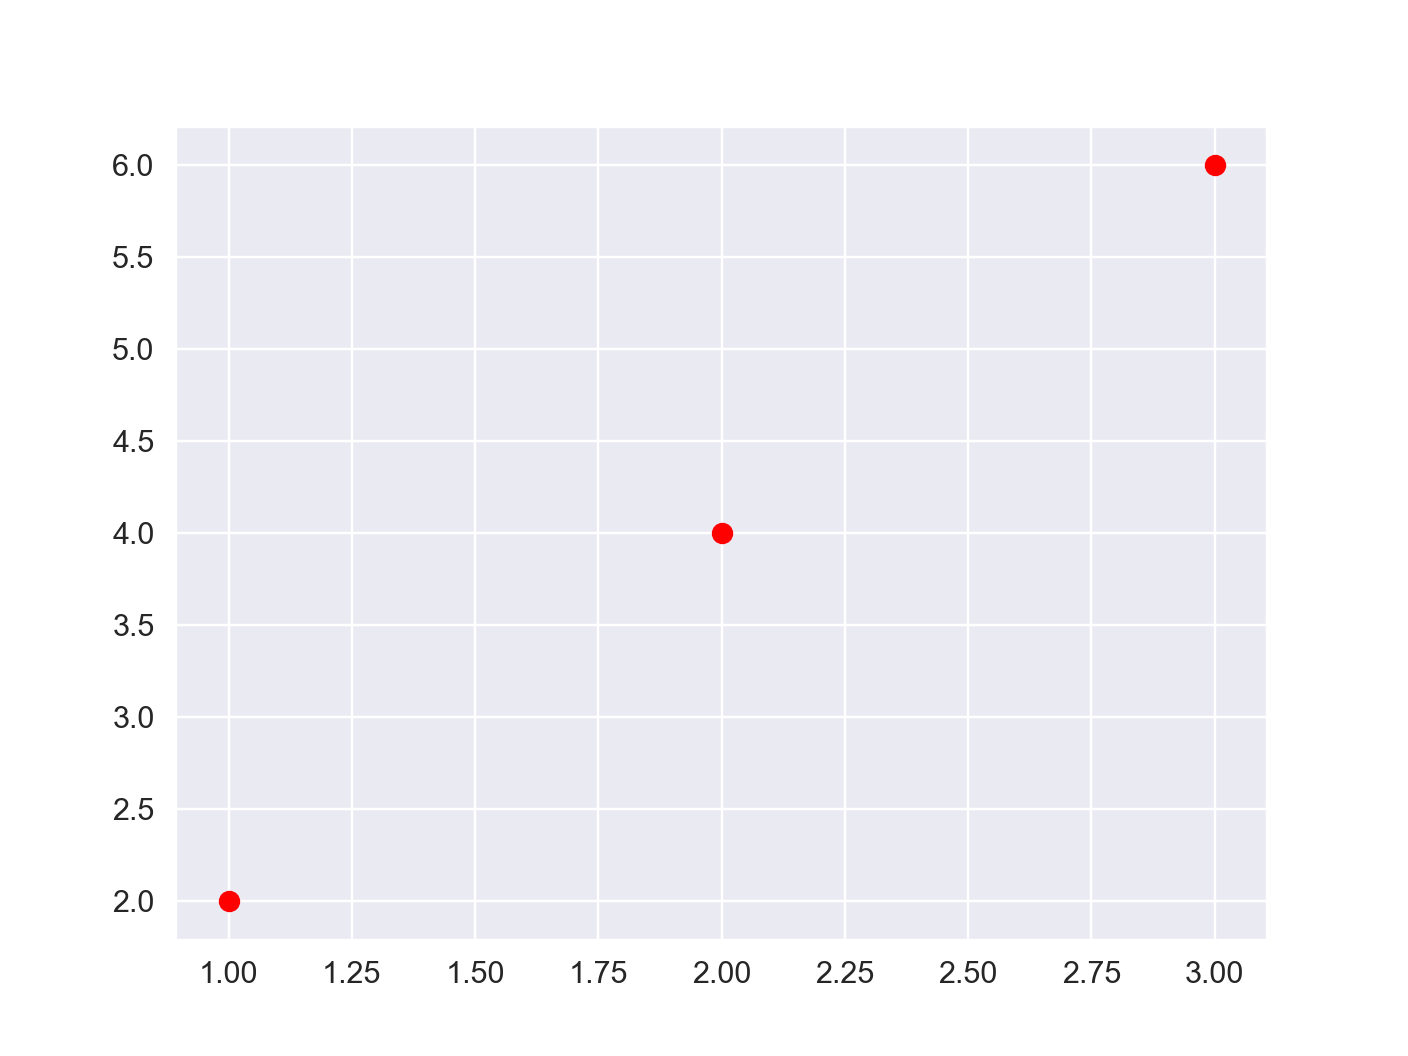

In [98]:
%matplotlib notebook
plt.scatter([1,2,3], [2,4,6], color = 'red')
plt.show()

## `%matplotlib inline`

In [3]:
%matplotlib inline
plt.scatter([1,2,3], [2,4,6], color = 'red')
plt.show()

# matplotlib objects
In matplotlib there are four types of objects from which every plot is built:
- __Figure__ is the whole plotting space. 
- __Axes__ are individual plots. Figure can contain one or more axes. Each axes has a title and two or three __axis__ for 2d and 3d plots correspondingly. 
- __Artist__ is everything that you can see on the plot (even the Figure, Axes, and Axis objects).

## matplotlib input
All matplotlib functions expect np.array or np.ma.masked_array as an
input. Pandas data objects, should generally work. If not, you can try to convert them into np.array using `values()` method.

## How to create a plot in matplotlib?
In matplotlib you can create a plot either __using stateful API__ or by __creating a figure object__.
    
In the first method you are plotting on default figure, and you will not have any way to access the previous plot when you start creating the new one. It is fine for creating simple ad-hoc figures, consisting of one axes. 

For more complicated plots it is easier to create your own figure object, and then modify it. You can work on more than one plot at the same time this way, and you will have constant access to the figure using variable you have assigned to it.

## Stateful API example

Statetful API is used by calling one of matplotlib plotting functions (like `plt.plot()` or `plt.scatter()`). The first call to this function will automatically create the necessary figure and axes. Subsequent calls to plotting functions re-use the current axes and each add another layer of graphics. When you are setting the title, axis labels or legend matplotlib also automatically uses the current axes.

## Stateful API
Let's plot a simple scatter plot using stateful API.

In [4]:
plt.scatter([1,2,3], [2,4,6], color = 'red')
plt.show()

## Stateful API
Next plot that we create replaces the previous one.

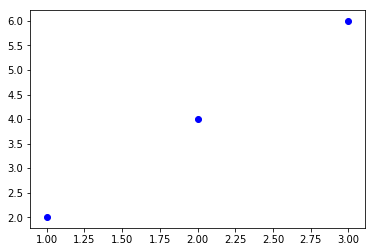

In [5]:
plt.scatter([1,2,3], [2,4,6], color = 'blue')
plt.show()

## Stateful API
If we execute two plotting function in the same Jupyter window both plots will be plotted on the same axes.

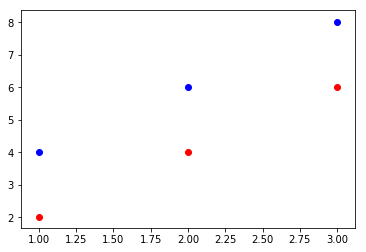

In [6]:
plt.scatter([1,2,3], [2,4,6], color = 'red')
plt.scatter([1,2,3], [4,6,8], color = 'blue')
plt.show()

## Figure object creation
You can create your own figure by calling `plt.subplots()` function. It returns two kinds of objects: __figure object__ and __one or more axes objects__ (subplots), depending on the number of subplots that you specify.

## Figure object creation
`plt.subplot()` with no arguments returns 1 figure object and 1 axes object.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113266828>)

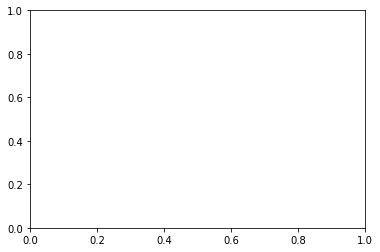

In [7]:
plt.subplots() 

## Figure object creation
We can specify `nrows` and `ncols` parameters in `plt.subplots()` to create more than one axes in the figure.

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1133eee10>,
       dtype=object))

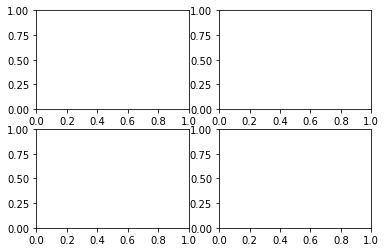

In [8]:
plt.subplots(nrows = 2, ncols = 2) # returns 1 figure object and 4 axes objects

## Working with Figure objects
We assign objects that `plt.subplots()` returns to variables and then use them to populate axes with visualisations. 

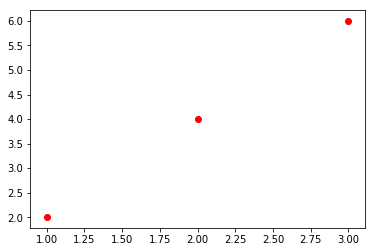

In [9]:
fig, ax = plt.subplots()
ax.scatter([1,2,3], [2,4,6], color = 'red')
plt.show()

## Working with Figure objects
If we execute another plotting function on the same object then another layer of graphics will be added.

In [10]:
ax.scatter([1,2,3], [1,2,3], color = 'green') # plot another scatter layers

## Working with Figure objects
We can call the figure whenever we want to display it.  

In [11]:
fig # access the figure

## Exercise 0 (3 min)

Using two lists below, create two plots. One using stateful API and other using object creation.

```python
x = [4, 12, 18, 25]
y = [1, 3, 5, 8]
```

# `plt.plot()` function

## `plot()` function
The basic function in matplotlib is the `plot()`. By default it creates a line plot, but you can modify it's parameters to get a scatter plot.

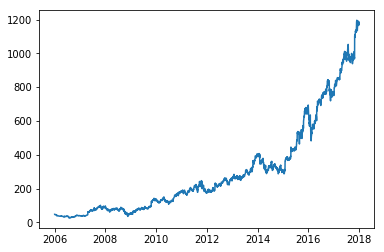

In [12]:
import matplotlib
import pandas as pd
import numpy as np
amzn = pd.read_csv('../data/AMZN_2006-01-01_to_2018-01-01.csv', parse_dates = [0])
plt.plot('Date', 'Close', data = amzn)
plt.show()

## `fmt` parameter
`plot()` function has a `fmt` parameter that can be used to customise the plot. It takes format string, that consits of three parts __'[color][marker][line]'__. As a color you can specify the first letter of one of supported colors. With marker you can select characters that will be plotted as points. Line part specifies how the line will look like. `fmt` options can be found in the [function's documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).


## `fmt` parameter
Here we are setting color to red, marker to `+` and line to `--`.

In [13]:
plt.plot(range(10), 'Close', 'r+--', data = amzn[0:10]) 
plt.show()

## `fmt` parameter
`go` as `fmt` means green color and dot as marker. Note that by omitting line parameter, we made it disapear, and we have created scatter plot.

In [14]:
plt.plot(range(10), 'Close', 'go', data = amzn[0:10]) # green color, points as dots, line as -
plt.show()

## `fmt` parameter
If the color is the only part of format string you can specify it as hex.

In [15]:
plt.plot(range(10), 'Close', '#d10423', data = amzn[0:10]) 
plt.show()

## Other `plot()` paramters
`fmt` parameter is just a shortcut to customise the plot. You can also specify properties like line color, line style, and many others using their corresponding parameter names. 

## Other `plot()` paramters

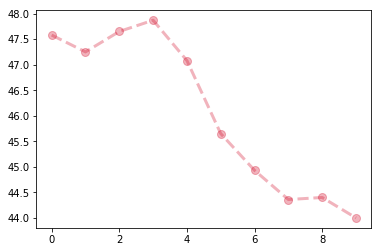

In [16]:
plt.plot(range(10), 
         'Close', 
         data = amzn[0:10],
         color = '#d10423', # line and markers color
         alpha = .3, # line and markers opacity
         linewidth = 3, # line width
         linestyle = '--', # line style
         marker = 'o', # marker style
         markersize = 8) # marker size
plt.show()

### Exercise 1 (10 min) 

We will be working with movies data in this section (movies_metadata.csv). For this exercise we would like to know how the average rating ('vote average') changed for english movies movies released in years 2006-2016?

To answer this question create a line plot. Modify the plot so the line and markers are blue, markers are displayed as 'x', and line is in '-.' format. Set line width to 2, markersize to 8 and opacity to 0.5.

# Other plot types

## Scatter
`scatter()` function provides a more direct way to create a scatter plot. You need to pass `x` and `y` arguments.

In [17]:
import pandas as pd
df = pd.read_csv('../data/mtcars.csv')
plt.scatter('mpg', 'hp', data = df)
plt.show()

## Histogram
`hist()` function creates a histogram. You just need to specify `x` value. `bins` argument is optional, you can use it to set the number of bins.

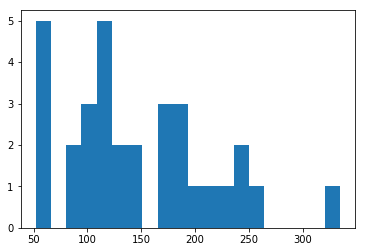

In [18]:
plt.hist('hp', data = df, bins = 20)
plt.show()

# Bar plot
`bar()` creates a bar plot. `x` argument must be a sequence of bars' indexes. `y` sets the height of each bar. You can use `tick_label` parameter to pass proper labels.

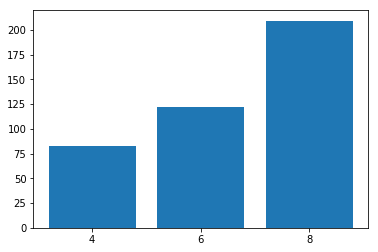

In [19]:
avg_hp_by_cyl = df.groupby(['cyl']).mean()[['hp']].reset_index() # calulate the mean by cyl value

plt.bar(range(3), 'hp', data = avg_hp_by_cyl, 
        tick_label = [str(c) for c in avg_hp_by_cyl.cyl])
plt.show()

## Horizontal bar plot
`barh()` is similar to `bar()` with a difference that it creates horizontal bars instead of vertical ones. Arguments need to be specified the same way.

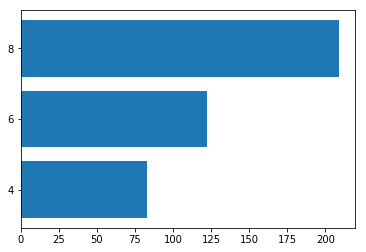

In [20]:
plt.barh(range(3), 'hp', data = avg_hp_by_cyl, tick_label = [str(c) for c in avg_hp_by_cyl.cyl])
plt.show()

## Boxplot
You can use `boxplot()` function to create a boxplot. It just needs a vector of numbers, and it will do all the calculations for you. `labels` arguments is useful for putting a proper label on the x axis. Notice that you need to pass it as a list.

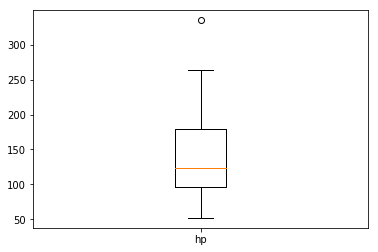

In [21]:
plt.boxplot(df.hp, labels = ['hp'])
plt.show()

## Multiple boxplot
If you give a list of sequences as an `x` argument to `boxplot()` function, it will draw multiple boxplots on the same plot. It is useful for comparison.

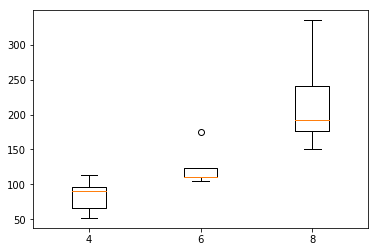

In [22]:
hps = [df.query('cyl == 4').hp, df.query('cyl == 6').hp, df.query('cyl == 8').hp]
plt.boxplot(hps, labels = [4, 6, 8])
plt.show()

### Exercise 2 (10 min) 

Using movies for which orginal language is english, answer these questions:
1. What is the relation between the movie popularity and revenues it brings? Create a scatter plot. Focus on the movies that were released in 2016, have popularity below 50 and revenue higher than 0. Set opacity of markers to 0.2.
2. How many movies were released each year from 2010-2016? Create a bar plot.
3. How the runtime of movies changed in years 2014-2016? Create a plot with three boxplots. Remove outliers.

# Adding more variables to a plot

## Size as the third variable
You can use visual aspects of markers, like their color or size, to add another variable to your plot, so you are no longer limited to two dimensions by x and y axes. 

`s` parameter can be used to make the size of points depend on some variable.

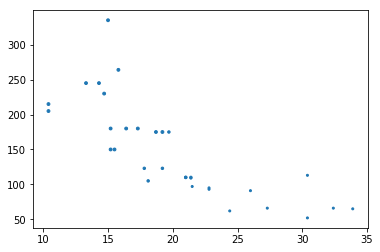

In [23]:
plt.scatter('mpg', 'hp', s = df.cyl, data = df)
plt.show()

## Size as the third variable
The difference in size on the previous plot was hard to notice. We can transform the variable we put as `s` to emphasize the difference.

In [24]:
import numpy as np
plt.scatter('mpg', 'hp', s = np.power(df.cyl, 2), data = df)
plt.show()

## Color as the third variable
It is usually a better idea to use color than size, because it is easier to tell the difference between categories. We can use `c` parameter to do that.

In [25]:
plt.scatter('mpg', 'hp', c = 'cyl', data = df)
plt.show()

## Adding the legend
Making the color of points to depend on some category is easy. It is harder however, to create a legend that will tell us which color stands for which category. There are two ways to do it.

## Adding the legend
You can create a list of Line2D objects that you will put into the legend:

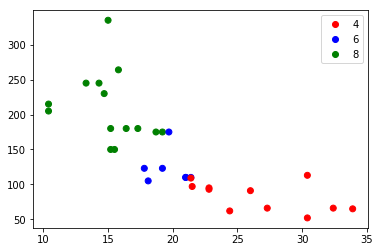

In [26]:
import matplotlib.lines as mlines
color_mapping = {4: 'red', 6: 'blue', 8: 'green'}
colors = df.cyl.apply(lambda x: color_mapping[x]) 
plt.scatter('mpg', 'hp', c = colors, data = df)
custom_lines = [mlines.Line2D([], [], marker = 'o', linestyle = 'None', color='red'),
                mlines.Line2D([], [], marker = 'o', linestyle = 'None', color='blue'),
                mlines.Line2D([], [], marker = 'o', linestyle = 'None', color='green')]
plt.legend(custom_lines, [4, 6, 8])
plt.show()

## Adding the legend
The second option is to plot every category as a seperate layer of graphics. If you do it this way, you will be able to generate the legend automatically.

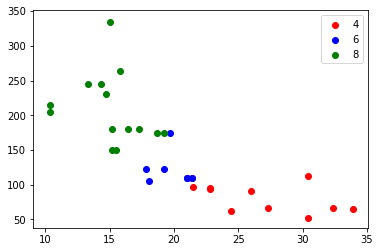

In [27]:
plt.scatter('mpg', 'hp', color='red', label = 4, data = df.query('cyl==4'))
plt.scatter('mpg', 'hp', color='blue', label = 6, data = df.query('cyl==6'))
plt.scatter('mpg', 'hp', color='green', label = 8, data = df.query('cyl==8'))
plt.legend()
plt.show()

### Exercise 3 (10 min)

What is the relation between movies' length and their rating?

To answer this question create a scatter. Focus on english movies released in 2016. Show only movies from action and romance genres. Make action movies blue, and romance movies red on the plot. Set alpha of markers to 0.3.

# Plot customisation

## Plot customisation
Not every plot property can be specified using a plotting function. For example you can't specify plot title, plot background color, and axes labels. To set those aspects of the plot we need to use designated functions.

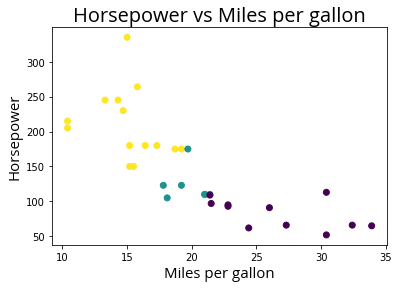

In [28]:
plt.scatter('mpg', 'hp', c = 'cyl', data = df)
plt.xlabel('Miles per gallon', fontsize = 15, fontname = 'Open Sans')
plt.ylabel('Horsepower', fontsize = 15, fontname = 'Open Sans') 
plt.title('Horsepower vs Miles per gallon', fontsize = 20, fontname = 'Open Sans')
plt.show()

## Plot customisation with `set_*` functions
If you create the figure and ax objects, you can change axes aesthetics by calling `set_` functions on the axes objects. 

In [29]:
amzn_fgr, amzn_ax = plt.subplots()
amzn_ax.plot('Date', 'Close', color = '#FFC300', data = amzn)
amzn_ax.set_xlabel('Year', fontsize = 15, fontname = 'Open Sans')
amzn_ax.set_ylabel('Share price', fontsize = 15, fontname = 'Open Sans')
amzn_ax.set_title('Sales in years 2010-2016', fontsize = 20, loc = 'left', fontname = 'Open Sans')
plt.show()

## Adding grid lines
`grid()` method can be used to add major and/or minor grid lines to the plot. They make it easier to see values corresponing to the points on the plot.

In [30]:
amzn_ax.grid(b = True, which = 'both')
amzn_fgr

## Modyfing ticks
`set_yticks()` and `set_xticks()` functions allow you to modify how many ticks are displayed, and with `set_yticklabel()` and `set_xticklabel()` you can modify their labels.

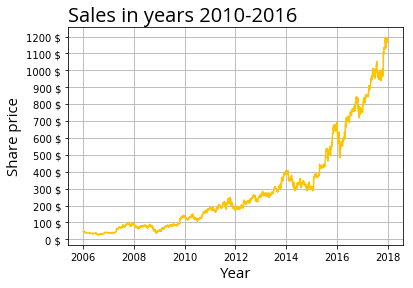

In [31]:
amzn_ax.set_yticks(np.arange(0, 1300, 100))
amzn_ax.set_yticklabels([str(t) + ' $' for t in np.arange(0, 1300, 100)])
amzn_fgr

## Changing plots background
`set_facecolor()` can be used to set the plot's backround color.

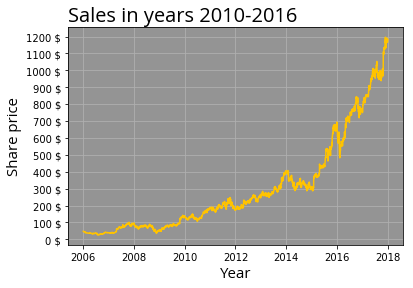

In [32]:
amzn_ax.set_facecolor('#949494')
amzn_fgr

## Setting limits of an axis
You can zoom in on the part of the plot that you are most interested in by using `set_xlim()` and `set_ylim()` functions. 

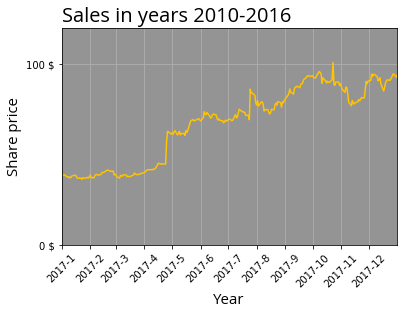

In [33]:
amzn_ax.set_xlim(('2007-01-01', '2007-12-31'))
amzn_ax.set_xticklabels(['2017-' + str(1+i) for i in range(12)], rotation = '45') # rotate x labels
amzn_ax.set_ylim((0, 120))
amzn_fgr

### Exercise 4 (5 min)
Take the plot from the previous exercise and:
1. Name x axis as 'Runtime', and y axis as 'Vote average'.
2. Add 'Relation between runtime and vote average' as the plot's title.
3. Make ticks on x axis from 0 to 150, every 30.
4. Change plot background to '#E1E1E7'.
5. Add white grid lines.
6. Move the legend to lower right corner of the plot.

# Plotting multiple plots

## Multiple plots
Using `plt.subplot()` you can create figure object that will contain more than one axes. By passing a third number to it you make the axes on a given position active and you can modify it.

In [34]:
plt.subplot(2,1,1); plt.plot('Date', 'Close', color = '#FFC300', data = amzn)
plt.subplot(2,1,2); plt.plot(amzn.Date, amzn.Volume / 1000000, color = 'red')
plt.yticks(range(0, 120, 20), [str(i) + ' M' for i in range(0, 120, 20)])
plt.tight_layout(); plt.show()

In [35]:
googl = pd.read_csv('../data/GOOGL_2006-01-01_to_2018-01-01.csv', parse_dates = [0])

plt.subplot(2,2,1); plt.plot('Date', 'Close', color = '#FFC300', data = amzn)
plt.yticks(range(0, 1400, 200), [str(i) + ' $' for i in range(0, 1400, 200)])
plt.xticks(rotation = 45); plt.title('Amazon'); plt.tight_layout()

plt.subplot(2,2,2); plt.plot('Date', 'Close', color = '#1F3BD5', data = googl)
plt.yticks(range(0, 1400, 200), [str(i) + ' $' for i in range(0, 1400, 200)])
plt.xticks(rotation = 45); plt.title('Google'); plt.tight_layout()

plt.subplot(2,2,3); plt.plot(amzn.Date, amzn.Volume / 1000000, color = '#C01832')
plt.yticks(range(0, 140, 20), [str(i) + ' M' for i in range(0, 140, 20)])
plt.xticks(rotation = 45); plt.tight_layout() # rotate x axis ticks

plt.subplot(2,2,4); plt.plot(googl.Date, googl.Volume / 1000000, color = '#C01832')
plt.yticks(range(0, 140, 20), [str(i) + ' M' for i in range(0, 140, 20)])
plt.xticks(rotation = 45); plt.tight_layout(); plt.show()

## Sharing axis between plots
`sharex` and `sharey` parameters in `plt.subplots()` can be used to share axis between plots.

## Sharing axis between plots

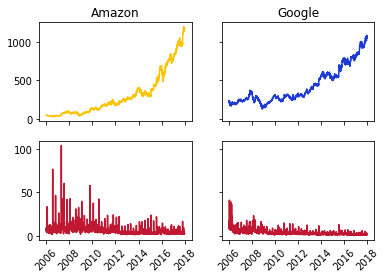

In [36]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex = True, sharey = 'row', figsize = (6, 4))
ax1.plot('Date', 'Close', color = '#FFC300', data = amzn)
ax2.plot('Date', 'Close', color = '#1F3BD5', data = googl)
ax3.plot(amzn.Date, amzn.Volume / 1000000, color = '#C01832')
ax4.plot(googl.Date, googl.Volume / 1000000, color = '#C01832')
ax3.set_xticklabels(list(range(2004, 2020, 2)), rotation = '45'                   )
ax4.set_xticklabels(list(range(2004, 2020, 2)), rotation = '45')
ax1.set_title('Amazon'); ax2.set_title('Google'); plt.show()

### Exercise 5 (7 min)
Create a set of 3 bar plots in one column that will show the number of movies released in each month in years 2014, 2015, 2016 (each bar plot should show different year). Set x-ticks labels to be abbreviated names of months (you can use calendar.month_abbr from calendar), y axis ticks should be from 0 to 180 every 30. Set the relevant year as a title of each plot. Bars for 2014 should be colored with #FF5733, for 2015 with #FFC300 and for 2016 with #C70039. Set the plot size to 10 by 8 inches. 

# Styles

## Styles
Basic matplotlib plots are not especially visually appealing. Fortunately you can use ready-made styles that will change how your plots look like. You can use a given style by calling `mplstyle.use()` function and giving it the name of a style as an argument. 

## Styles

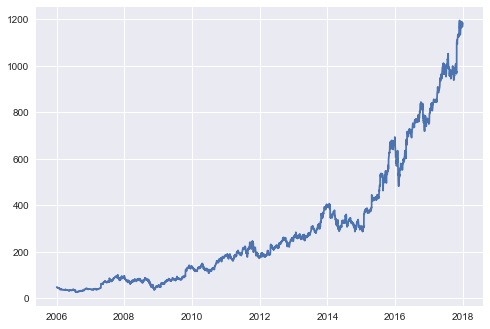

In [37]:
import matplotlib.style as mplstyle
mplstyle.use('seaborn')
plt.plot('Date', 'Close', data = amzn); plt.show()

Note that you need to import `mplstyle` first.

## Styles
The style you have selected will be applied to all plots that you will create during the session. So if we create another plot it will have the same style as the previous one.

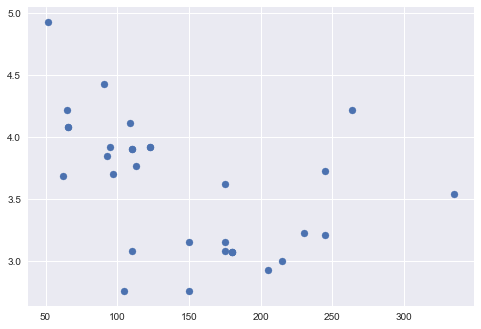

In [38]:
fig_s, ax_s = plt.subplots()
ax_s.scatter('hp', 'drat', data = df)
plt.show()

## Applying a style to just one plot 
If you want to apply a given style to just one plot you can use `with` construction.

In [39]:
with plt.style.context(('ggplot')):
    plt.scatter('hp', 'mpg', data = df)

## Going back to the default style
You can revert to basic matplotlib style by passing `default` to `mplstyle.use`.

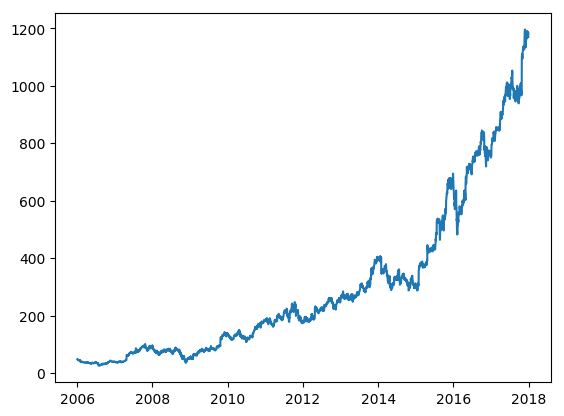

In [40]:
mplstyle.use('default'); 
plt.plot('Date', 'Close', data = amzn); plt.show()

## Checking available styles
You can check the list of available styles using `print(plt.style.available)`

In [41]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


### Exercise 6 (5 min)
Choose one of the plots you have created earlier and experiment with different styles. Choose the one that you like the most.

# Seaborn

## Seaborn
- Seaborn is Python package that is built on matplotlib. 
- It extends matplotlib with more sophisticated and visually appealing statistical visualisations. 
- It is easier to use than basic matplotlib.
- It is best used with Pandas DataFrames.

## Importing seaborn
By convention seaborn is imported as sns.

In [42]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # hide warnings caused by seaborn

# seaborn plot types

## Distribution plot
`distplot()` function plots histogram and and kernel density estimate (KDE), by default. You just need to specify one parameter. 

In [43]:
sns.distplot(df.mpg); plt.show()

## `distplot()` parameters
You can change the number of bins using `bins` parameter. KDE can be removed by setting `kde` parameter to `False`. You can add small vertical tick at each observation setting `rug` to `True`.

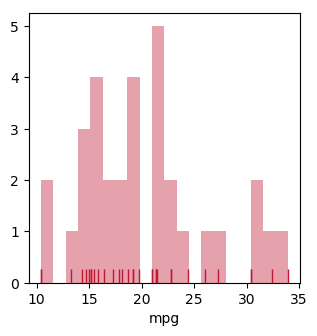

In [44]:
plt.figure(figsize=(3.5,3.5))
sns.distplot(df.mpg, bins = 20, rug = True, kde = False, color = '#C01832')
plt.show()

## `distplot()` parameters
`distplot()` function uses two other seaborn functions under the hood: `kde` and `rugplot`. You can change their arguments by passing the dictionary with parameters names as keys, and their arguments as values to the corresponding `_kws` paramter.

## `distplot()` parameters

In [45]:
sns.distplot(df.mpg, bins = 20, hist = False, kde_kws = {'shade': True}, color = '#C01832')
plt.show()

## Exercise 7 (5 min)

What is the distribution of ratings ('vote average') for english movies released in 2016? 

Switch KDE off, set the number of bins to 10.

## Plotting regression lines

In seaborn there are two functions that plot linear regression: `regplot()` and `lmplot()`. They work similarly in most situations, with a difference that with `lmplot()` you can plot linear regression for more than one group, as it is combination of `regplot()` and `FacetGrid`.

## `regplot()`
To use regplot you just need to specify `x` and `y` parameters.

In [46]:
sns.regplot('hp', 'mpg', data = df); plt.show()

## Plotting polynomial regression lines
You can specify the degree of polynomial to be fitted with `order` parameter.

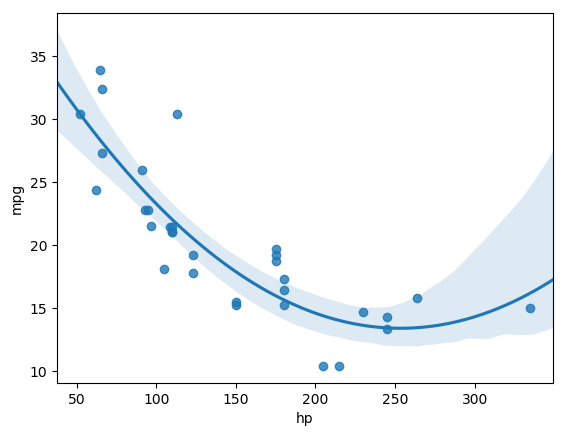

In [47]:
sns.regplot('hp', 'mpg', data = df, order = 2); plt.show()

## `regplot()` with categorical variables
A nice feature of `regplot()` is that it provides a way to work with categorical variables (but you must convert them to numbers first). If you plot them in traditional way it is very informative. 

In [48]:
plt.figure(figsize=(4, 4)); sns.regplot(x = 'cyl', y = 'hp', data = df); 

## `regplot()` with categorical variables
However, you can use `x_estimator` to transform the data using a named function.

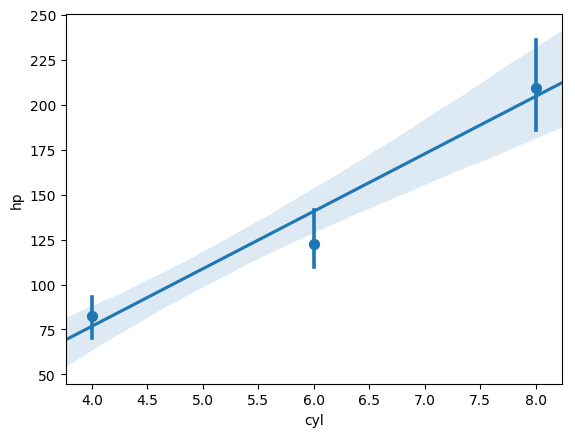

In [49]:
sns.regplot(x = 'cyl', y = 'hp', data = df, x_estimator = np.mean); plt.show()

## Dividing data into bins in `regplot()`
`x_bins` argument can be used to split the data into equal sized bins.

In [50]:
plt.figure(figsize=(4, 4)); sns.regplot(x = 'qsec', y = 'hp', data = df, x_bins = 4)

## Coloring points according to a variable
In seaborn it is much easier than in matplotlib to color points according to some variable. Apropriate legend is automatically created for you. Seaborn will fit separate linear regression line for each group. Note that we have switched to `lmplot()` function.

## Coloring points according to a variable

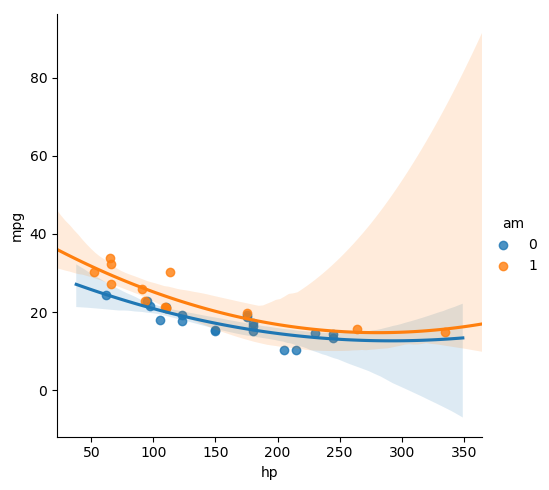

In [51]:
sns.lmplot('hp', 'mpg', data = df, hue = 'am', order = 2); plt.show()

## Changing the pallete and marker type
You can specify which color pallete will be used for coloring points with a `pallete` parameter. Shapes of plots can be also changed with a `markers` parameter. 

## Changing the pallete and marker type

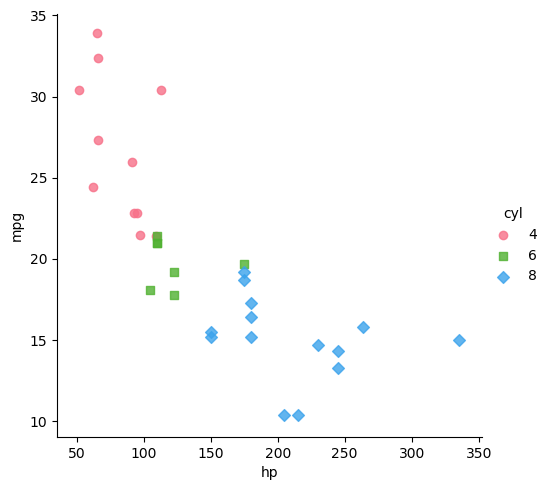

In [52]:
sns.lmplot('hp', 'mpg', palette = 'husl', data = df, hue = 'cyl', 
           fit_reg = False, markers=["o", "s", "D"]); plt.show()

## Types of palletes
In seaborn we can use three types of palletes, to color the data.

- sequential

In [53]:
sns.palplot(sns.color_palette("Blues", 8)) 

## Types of palletes
- categorical

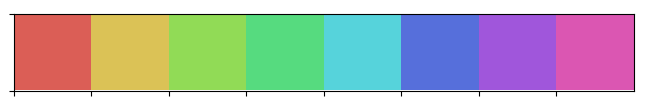

In [54]:
sns.palplot(sns.color_palette("hls", 8)) 

## Types of palletes
- diverging

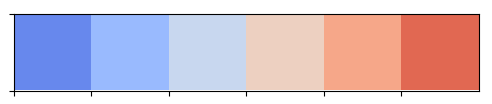

In [55]:
sns.palplot(sns.color_palette("coolwarm", 6))

You can find examples of these three palettes' types in the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Exercise 8 (5 min)
Plot the relation between the budget and the popularity for movies released in years 2005 and 2015. Select only movies with budget higher than 0 and popularity lower than 50. Transform budget values to millions. Add the separate regression line for each year. Set the alpha of markers to 0.3. 

## Faceting
By specyfing `col` and/or `row` argument in `lmplot()` you can create separate plots for each category.

## Faceting

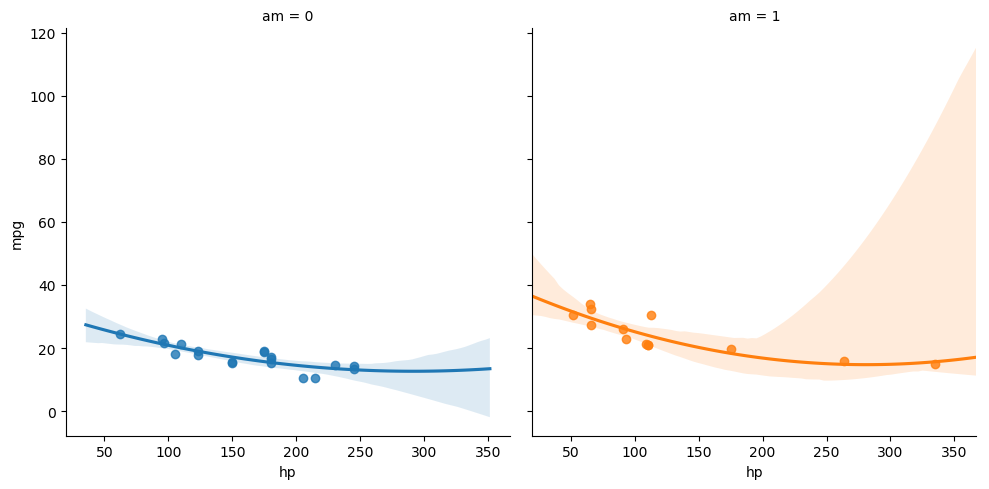

In [56]:
sns.lmplot('hp', 'mpg', data = df, hue = 'am', col = 'am', order = 2); plt.show()

## Exercise 9 (3 min)
Add the year 1995 to the previous plot, and split it into 3 subplots, one for every year.

## Plotting residuals
`residplot()` can be used to plot residuals.

## Plotting residuals

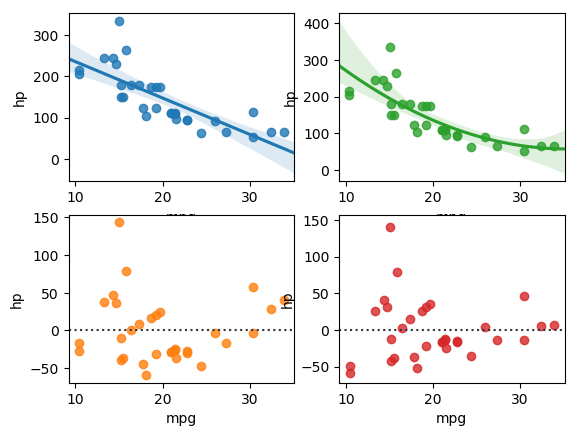

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
sns.regplot(x = 'mpg', y = 'hp', order = 1, data = df, ax = ax1);
sns.residplot(x = 'mpg', y = 'hp', order = 1, data = df, ax = ax3)
sns.regplot(x = 'mpg', y = 'hp', order = 2, data = df, ax = ax2)
sns.residplot(x = 'mpg', y = 'hp', order = 2, data = df, ax = ax4); plt.show()

# Categorical plots

# Load iris data
Let's prepare the data. We will use iris data set here.

In [58]:
from sklearn import datasets
iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw['data'])
col_names = list(map(lambda x: x.replace(' (cm)', '').replace(' ', '_'), iris_raw['feature_names']))
iris.columns = col_names
iris['specie'] = iris_raw['target']
vals_to_names_dict = {i:iris_raw['target_names'][i] for i in range(3)}
iris['specie'] = iris['specie'].apply(lambda x: vals_to_names_dict[x])
iris.head()

sepal_length  sepal_width  petal_length  petal_width  specie
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Striplot 
`stripplot()` shows a point for every observation with given value of the variable of interest.

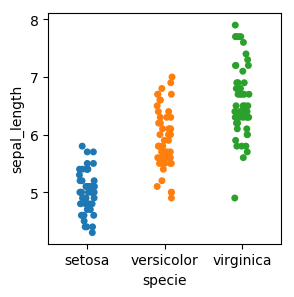

In [59]:
plt.figure(figsize=(3,3)); sns.stripplot(x = 'specie', y = 'sepal_length', data = iris); 
plt.show()

## `jitter` parameter
With this kind of plots there is high probability that observations with the same value of the variable will be plotted on each other. `striplot()` by default applies some noise to solve this. You can change the value of noise using `jitter` parameter. It is also useful to lower points' opacity, to know the amount of overlap. You can use `alpha` for that.

## `jitter` parameter

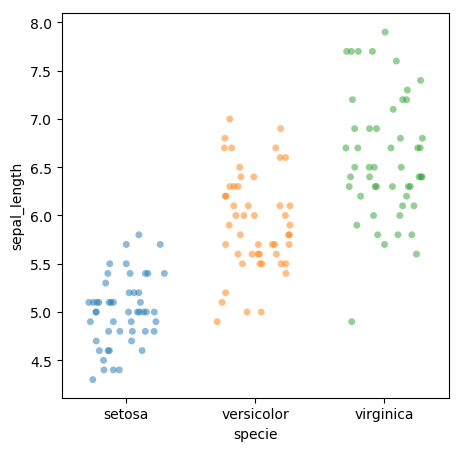

In [60]:
plt.figure(figsize=(5,5))
sns.stripplot(x = 'specie', y = 'sepal_length', jitter = 0.30, data = iris, alpha = .5); plt.show()

## Swarmplot
`swarmplot()` works similarly to the `striplot()` but automatically puts points with the same value next to each other. It is computionally expensive, so may be slow for large data sets.

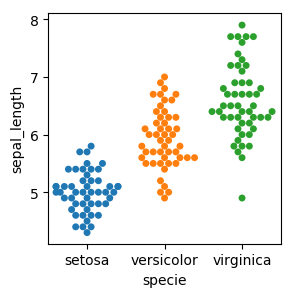

In [61]:
plt.figure(figsize=(3, 3))
sns.swarmplot(x = 'specie', y = 'sepal_length', data = iris); plt.show()

## Boxplot
`boxplot()` function creates boxplots for each category, so you don't need to split your data manually as it was the case with matplotlib.

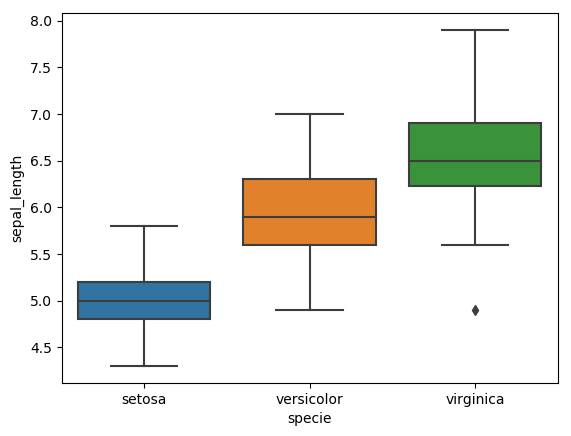

In [62]:
sns.boxplot(x = 'specie', y = 'sepal_length', data = iris); plt.show()

## Violinplots
Violin plots show the distribution of the value of interest for each category. They might be easier to interpret than boxplots for non-technical audience. You can create violin plot in seaborn using `violinplot()` function.

In [63]:
plt.figure(figsize=(4,4)); 
sns.violinplot(x = 'specie', y = 'sepal_length', data = iris); plt.show()

## Letter value plots
Letter value plots are something in between a boxplot and a violin plot. They are especially useful for large data sets (> 10.000) for which quantiles beyond quartiles can be more precisly estimated. `lvplot()` function creates it for you.

In [64]:
plt.figure(figsize=(4, 4))
sns.lvplot(x = 'specie', y = 'sepal_length', data = iris); plt.show()

## Count plot
A count plot shows you the number of observations for each category as a bar. You only need to specify categorical variable, data is summarised for you.

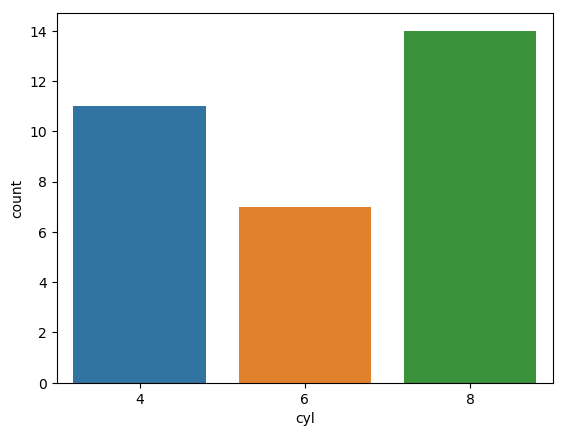

In [65]:
sns.countplot(x = 'cyl', data = df); plt.show()

## Changing bars' orientation
You can change bars' orientation by passing categorical variable either as `x` or as `y` parameter.

In [66]:
sns.countplot(y = 'cyl', data = df); plt.show()

## Using `hue` parameter
You can further split bars by some other category by passing it as an argument to hue parameter.

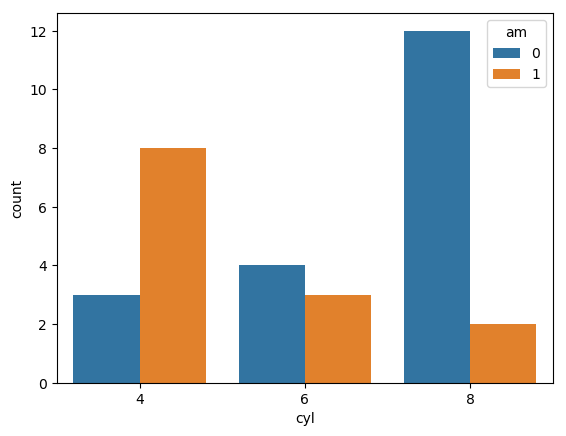

In [67]:
sns.countplot(x = 'cyl', hue = 'am', data = df); plt.show()

## Bar plot 
`barplot()` function is more versatile version of `countplot()`, because you can specify the function that will be used to summarise the data by passing it to the `estimator` parameter (mean is it's default value).

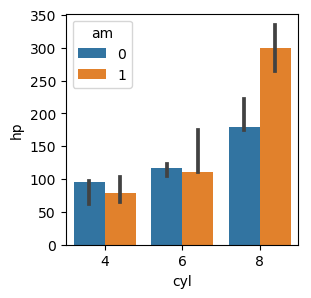

In [68]:
plt.figure(figsize=(3, 3)); sns.barplot(x = 'cyl', y = 'hp', hue = 'am', estimator = np.median, data = df)
plt.show()

## Switching off confidence intervals
`barplot()` draws confidence intervals by default. You can switch them off by passing `None` to `ci` parameter.

In [69]:
plt.figure(figsize=(4, 4)); sns.barplot(x = 'cyl', y = 'hp', hue = 'am', estimator = np.median, data = df, ci = None) 
plt.show()

## Setting `estimator` parameter
If you set estimator to `len` you will get the same plot as with count plot.

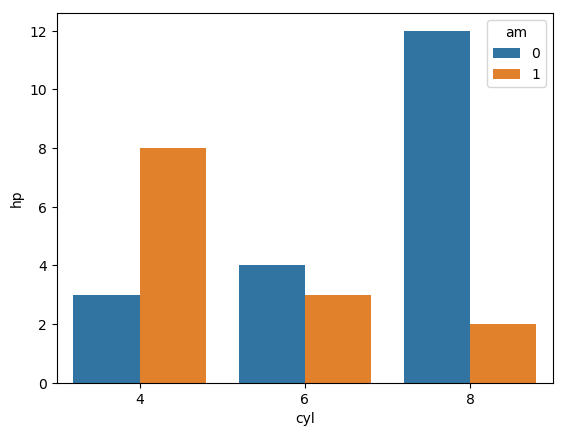

In [70]:
sns.barplot(x = 'cyl', y = 'hp', hue = 'am', estimator = len, data = df); plt.show()

## Point plot
`pointplot()` function works similarly to `barplot()` but visualises summary statistics in the form of points connected with a line. It can be easier to spot differences between categories this way.

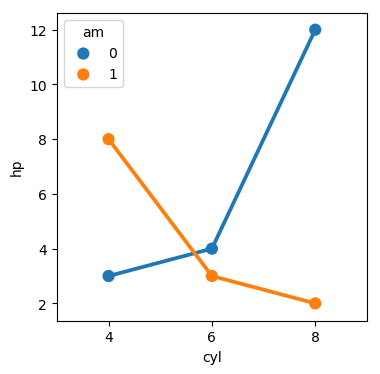

In [71]:
plt.figure(figsize=(4, 4))
sns.pointplot(x = 'cyl', y = 'hp', hue = 'am', estimator = len, data = df); plt.show()

## Exercise 10 (10 min)
Divide movies into three genres: romance, action, and horror.

1. Create a violin plot that shows ratings for english romance, action, and horror movies released in 2016. Compare it to swarm plot.
2. Create a boxplot that will show the popularity of romance, action, and horror films in 2016.
3. Create a bar plot that shows the number of english romance, action, and horror movies released in years 2010-2016.

## Heatmaps

## Data preparation
Before we create a heatmap we need to prepare the data first. Pandas `crosstab()` function is useful for that.

In [72]:
ct = pd.crosstab(np.round(iris['sepal_width']), np.round(iris['sepal_length']), 
                 values = iris['specie'], aggfunc = 'count').round(0)
ct.fillna(0, inplace = True)
ct

sepal_length  4.0   5.0   6.0   7.0  8.0
sepal_width                             
2.0           1.0   5.0  12.0   1.0  0.0
3.0           4.0  26.0  51.0  22.0  4.0
4.0           0.0  16.0   5.0   1.0  2.0

## Creating the heatmap
`sns.heatmap()` function creates a heatmap. You can pass `pd.crosstab()` result to it as an argument.

In [73]:
plt.figure(figsize=(4, 4)); 
sns.heatmap(ct)
plt.show()

## Customizing heatmap
Sometimes it is useful to see exact values for each field. You can add them by passing `True` to the `annot` parameter. Color scale can be changed with `cmap`. You can also remove color bar on the right by setting `cbar` to `False`

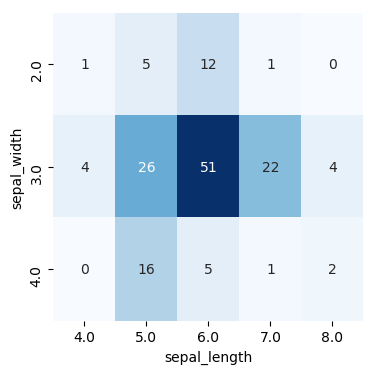

In [74]:
plt.figure(figsize=(4, 4)); 
sns.heatmap(ct, annot = True, cmap = 'Blues', cbar = False); plt.show()

## Plotting correlations
Heatmaps are ideal for checking correlations between columns in the data. Fortunately, `sns.heatmap()` works nicely with pandas `df.corr()`.

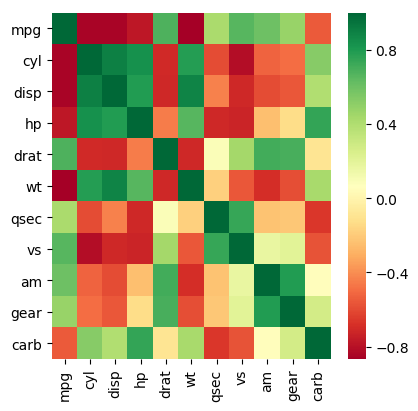

In [75]:
plt.figure(figsize=(4.5, 4.5))
sns.heatmap(df.corr(), cmap = 'RdYlGn'); plt.show()

### Exercise 11 (7 min)
Create a heatmap that will show the correlations between budget, revenue, popularity, and vote_average. Select only movies released in years 2014, 2015, and 2016, movies with english language, and with values in columns of interest above 0. Set the range of values in color map to be from -1 to 1. Put correlation values on the heatmap.

# Facetting

## Facetting with `FacetGrid()`
We have seen that with `lmplot()` we can split the data on some categorical variable and create a separate plot for each value of that variable. This procedure is sometimes called __facetting__ and can be done with every plot type using `sns.FacetGrid()`. You need create a facetted plot first, and then you populate it using `map()` method.

## Facetting with `FacetGrid()`

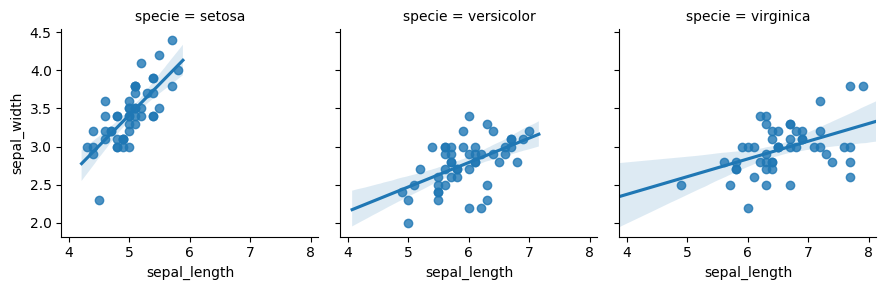

In [76]:
fg = sns.FacetGrid(iris, col = 'specie')
fg.map(sns.regplot, 'sepal_length', 'sepal_width')
plt.show()

## Defining rows and columns
You can split your data on two categories using both `row` and `col` parameters.

In [77]:
fg = sns.FacetGrid(df, col = 'cyl', row = 'am', height = 2)
fg.map(sns.distplot, 'hp'); plt.show()

## Factor plot
`factorplot()` function gives a simpler way to created faceted plots. You can create grid and the mapping at once. But you can't create all plots this way.

In [78]:
sns.factorplot(data = df, x = 'hp', kind = 'violin', col = 'cyl'); plt.show()

## Pairplots
Pairplots are useful way to check relations between the columns in your data. You can create them similarly to facet grids. You need to create pair grid first using `PairGrid()` function, and then populate plots using `map()` method. 

In [79]:
pg = sns.PairGrid(df, vars = ['mpg', 'hp'], height = 1.9)
pg.map(sns.regplot); plt.show()

## Using `map_offdiag()` and `map_diag()`
It is not very useful to have the same plot on diagonal of pair grid as on the off diagonal. You can use `map()` method variants `map_offdiag()` and `map_diag()` to have more control on what types of plots will be plotted where.

## Using `map_offdiag()` and `map_diag()`

In [80]:
pg = sns.PairGrid(df, vars = ['mpg', 'hp'], height = 2.5)
pg = pg.map_offdiag(sns.regplot); pg = pg.map_diag(plt.hist); plt.show()

## `pairplot()` function
`pairplot()` function provides a simplified way of creating pairplots. You just need to select columns that you are interested in and it does all the work for you.

In [81]:
sns.pairplot(df, vars = ['mpg', 'hp'], height = 2.1); plt.show()

## Modyfing types of plots in `pairplot()`
Types of plots created with `pairplot()` can be modified using `kind` and `diag_kind` parameteres.

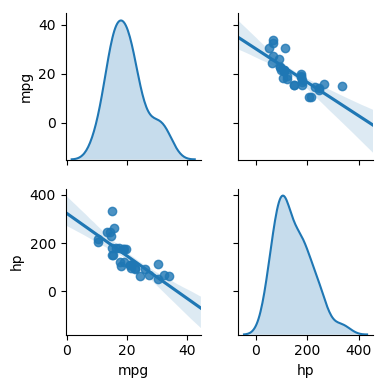

In [82]:
sns.pairplot(df, vars = ['mpg', 'hp'], kind = 'reg', diag_kind = 'kde', height = 2); plt.show()

## `hue` parameter
Both `PairGrid()` and `pairplot()` take `hue` parameter so you can explore the data by some category.

In [83]:
sns.pairplot(df, vars = ['mpg', 'hp'], hue = 'cyl', height = 2); plt.show()

### Exercise 12 (7 mins)
Create a pairplot using budget, revenue, popularity, and vote_average columns. Select only movies released in years 2014, 2015, 2016. Color the data by year. Remove 0 values from the data. Show budget and revenue columns in millions.

# Customizing seaborn plots

## Customizing seaborn plots
There are several ways to modify seaborn plots: 
- `sns.axes_style()` function can be used to change more general aesthetics of the plot like a font. 
- `ax.set()` method allows you to change the plot properties like x and y axis labels, ticks and the plot title. 
- You can also use standard matplotlib `set_` functions.

## Customizing seaborn plots

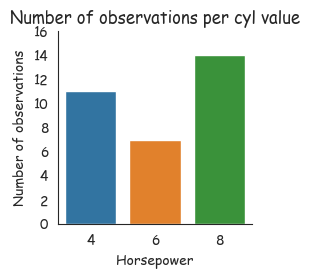

In [84]:
with sns.axes_style('white', {'font.sans-serif': 'Comic Sans MS'}):
    fig_sns_1, ax_sns_1 = plt.subplots(figsize=(2.5, 2.5))
    sns.countplot(df['cyl'], ax = ax_sns_1)
    ax_sns_1.set(xlabel="Horsepower", # set the y-axis label
                 ylabel = 'Number of observations', # set the y-axis label
                 yticks = [i for i in range(0, 18, 2)]) # set the y-axis ticks
    sns.despine() # remove plot borders that are not x and y axis
    # set the plot title and font size
    ax_sns_1.set_title("Number of observations per cyl value", fontdict = {'fontsize': 12}) 
    plt.show()

## Style parameters
You can check values for the current style by executing `sns.axes_style()`.

In [85]:
sns.axes_style()

{'axes.axisbelow': 'line',
 'axes.edgecolor': 'black',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'image.cmap': 'viridis',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'text.color': 'black',
 'xtick.bottom': True,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False}

## Seaborn themes
Seaborn has five themes that you can use in your plots: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. You can change the style with `sns.set_style()` function.

In [86]:
plt.figure(figsize=(4, 4)); 
sns.set_style('whitegrid'); sns.countplot(data = df, x = 'cyl'); plt.show()

## Seaborn themes

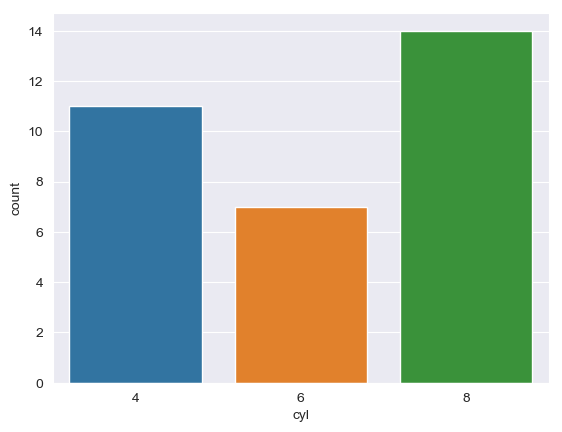

In [87]:
sns.set_style('darkgrid'); sns.countplot(data = df, x = 'cyl'); plt.show()